In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
Selfie = cv2.imread('Selfie.png')
Selfie = cv2.cvtColor(Selfie, cv2.COLOR_BGR2RGB)
signature = cv2.imread('signature.png')
signature = cv2.cvtColor(signature, cv2.COLOR_BGR2RGB)

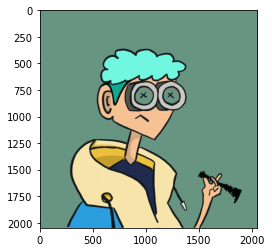

In [4]:
plt.imshow(Selfie)
plt.show()

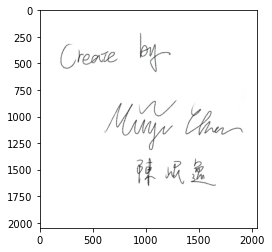

In [5]:
plt.imshow(signature)
plt.show()

In [6]:
def dct(image):
        image_float = np.float32(image)
        image_dct = np.zeros(image.shape)
        for i in range(3):
            image_dct[:,:,i] = cv2.dct(image_float[:,:,i])
        return image_dct
def idct(image):
        image_idct = np.zeros(image.shape)
        for i in range(3):
            image_idct[:,:,i] = cv2.idct(image[:,:,i])
        image_idct = np.int32(image_idct)
        return image_idct

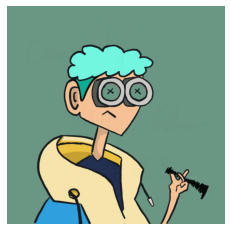

In [16]:
def combine_by_dct(signature,Selfie,coef):
    watermark_dct = dct(signature)
    background_dct = dct(Selfie)
    combine_dct = watermark_dct  + background_dct *coef
    combine_idct = idct(combine_dct)
    embd_img = combine_idct//(coef+1)
    return embd_img
combine_img = combine_by_dct(signature,Selfie,50)
plt.axis("off")
plt.imshow(combine_img)
plt.savefig('selfie_embded.png', dpi=150)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


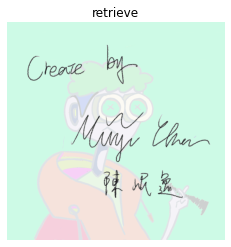

In [12]:
def retrieve_by_idct(combine_img,Selfie,coef):
    weight_combine_img = combine_img * (coef + 1)
    embd_dct = dct(weight_combine_img)
    background_dct = dct(Selfie)
    extract_img = embd_dct - background_dct * coef
    retrieve_idct = idct(extract_img)
    return retrieve_idct
retrieve_img = retrieve_by_idct(combine_img,Selfie,50)
plt.title('retrieve')
plt.axis("off")
plt.imshow(retrieve_img)